# Titanic Dataset
**Description**:
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone on board, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix

Data Exploration

**Variable Definition Key**
| Variable | Description                               | Values                                      |
|----------|-------------------------------------------|---------------------------------------------|
| survival | Survival                                  | 0 = No, 1 = Yes                             |
| pclass   | Ticket class                              | 1 = 1st, 2 = 2nd, 3 = 3rd                   |
| sex      | Sex                                       |                                             |
| age      | Age in years                              |                                             |
| sibsp    | Number of siblings / spouses aboard      |                                             |
| parch    | Number of parents / children aboard      |                                             |
| ticket   | Ticket number                             |                                             |
| fare     | Passenger fare                            |                                             |
| cabin    | Cabin number                              |                                             |
| embarked | Port of Embarkation                       | C = Cherbourg, Q = Queenstown, S = Southampton |



In [2]:
#reading Data
titanic_data = pd.read_csv('Titanic-Dataset.csv')

In [3]:
#showing data
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Show columns
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#information about the dataset 
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#Showing statistical about numeric columns
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Cleaning

In [7]:
#Cheking null values in every columns
titanic_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

as we see there is 3 columns that contains missing values 'Age','Cabin' and 'Embarked' let's choose the best strategy for each column

In [8]:
#The 'Age' column, we use the mean stategy to deal with missing values
age_mean = titanic_data['Age'].mean()
titanic_data['Age'] = titanic_data['Age'].fillna(age_mean)
titanic_data['Age'].isna().sum()

0

In [9]:
#The 'Cabin' Column let's drop this column beacause it doesn't help in our task:
titanic_data.drop(columns=['Cabin'],inplace=True)

In [10]:
#For the 'Embarked' column let's fill with the most frequent item
most_frequent_item = titanic_data['Embarked'].value_counts().idxmax()
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(most_frequent_item)
titanic_data['Embarked'].isna().sum()

0

In [11]:
#Recheck null values in the dataset
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
#Let's encode the 'Sex' and 'Embarked' columns
label_encoder = LabelEncoder()
titanic_data['Sex'] = label_encoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = label_encoder.fit_transform(titanic_data['Embarked'])

In [13]:
#Drop unnessery columns : 
titanic_data.drop(columns=['Ticket','PassengerId','Name'],inplace=True)

In [14]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Data Visualization

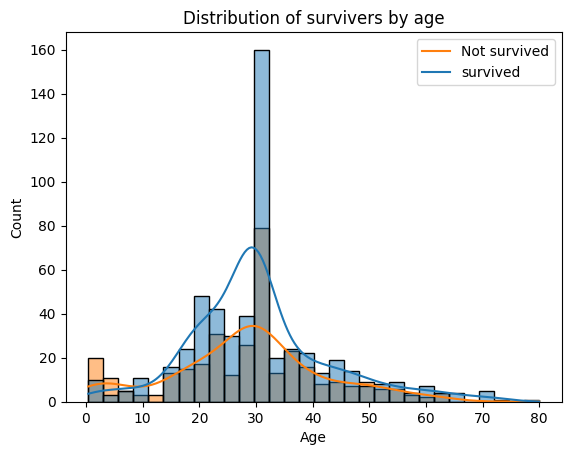

In [15]:
#Exploring the distribution by Age
sns.histplot(x='Age',hue='Survived',kde=True,data=titanic_data)
plt.title('Distribution of survivers by age')
plt.legend(['Not survived','survived'])
plt.show()

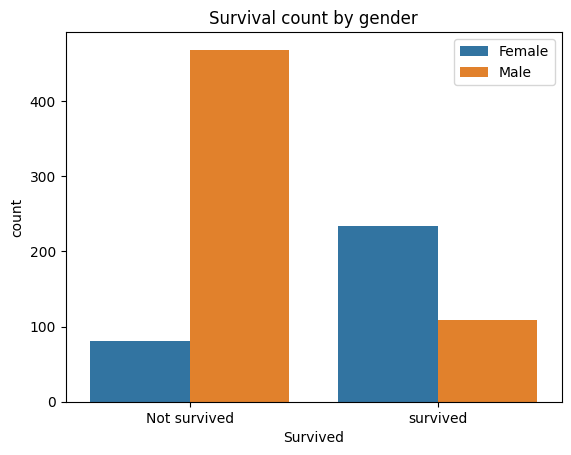

In [16]:
#Exploring the distribution of surviver by gender
sns.countplot(x='Survived',hue='Sex',data=titanic_data)
plt.title("Survival count by gender")
plt.legend(['Female','Male'])
plt.xticks((0,1),labels=['Not survived','survived'])
plt.show()

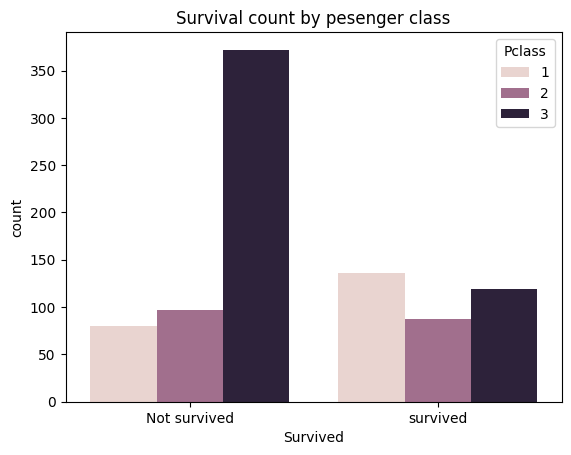

In [17]:
#Exploring the distribution of surviver by pesenger class
sns.countplot(x='Survived',hue='Pclass',data=titanic_data)
plt.title("Survival count by pesenger class")
plt.xticks((0,1),labels=['Not survived','survived'])
plt.show()

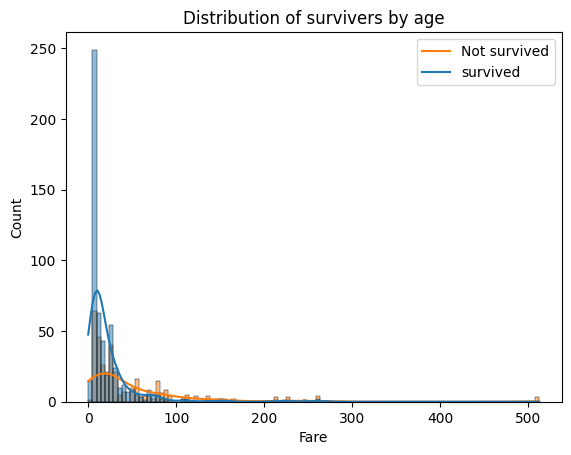

In [18]:
#Exploring the Fare between pessenger 
sns.histplot(x='Fare',hue='Survived',kde=True,data=titanic_data)
plt.title('Distribution of survivers by age')
plt.legend(['Not survived','survived'])
plt.show()

In [19]:
#Split the data into training and testing 
X = titanic_data.drop(columns=['Survived'],axis=1)
y = titanic_data['Survived']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

scaler = StandardScaler()
X_train_scalled = scaler.fit_transform(X_train)
X_test_scalled = scaler.fit_transform(X_test)


model = SVC()
model.fit(X_train_scalled,y_train)
y_pred = model.predict(X_test_scalled)
print(f"prediction :{y_pred}")

print('_______________________________________________________________________________')
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
confx_matrix = confusion_matrix(y_test,y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precission: {precision}") 
print(f"Confussion Matrix :\n{confx_matrix}")



prediction :[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]
_______________________________________________________________________________
Accuracy: 0.8171641791044776
Precission: 0.8780487804878049
Confussion Matrix :
[[147  10]
 [ 39  72]]


In [20]:
prediction = pd.DataFrame(y_pred,columns=['Survived'])
prediction['Survived'] = prediction['Survived'].map({0:'Did not survived',1:'Survived'})
prediction

,Survived
0,Did not survived
1,Did not survived
2,Did not survived
3,Survived
4,Survived
...,...
263,Did not survived
264,Did not survived
265,Did not survived
266,Did not survived
